<a href="https://colab.research.google.com/github/georgepar/lt-asrtts/blob/main/notebooks/Lecture%202/time_vs_frequency_domain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Signal time domain vs frequency domain

Source: https://slpcourse.github.io

Text(0.5, 1.0, 'Fourier transform depicting the frequency components')

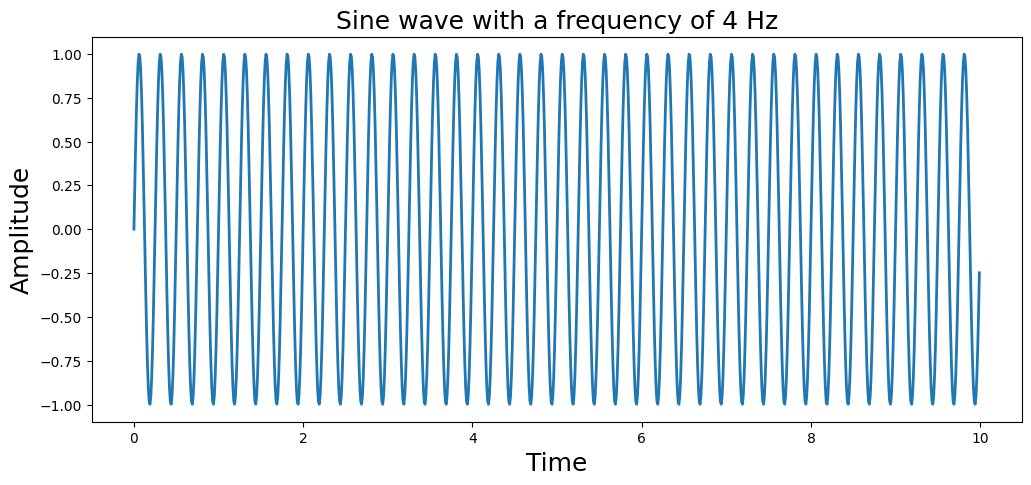

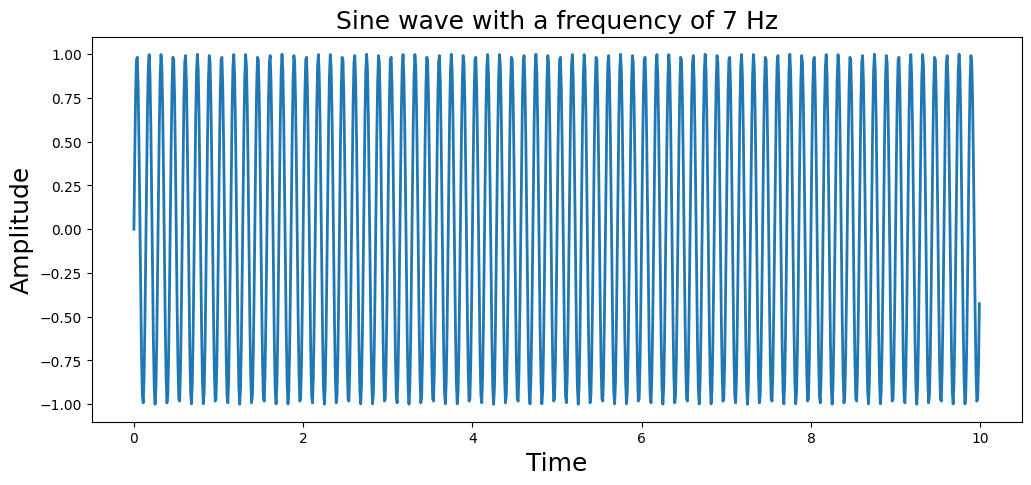

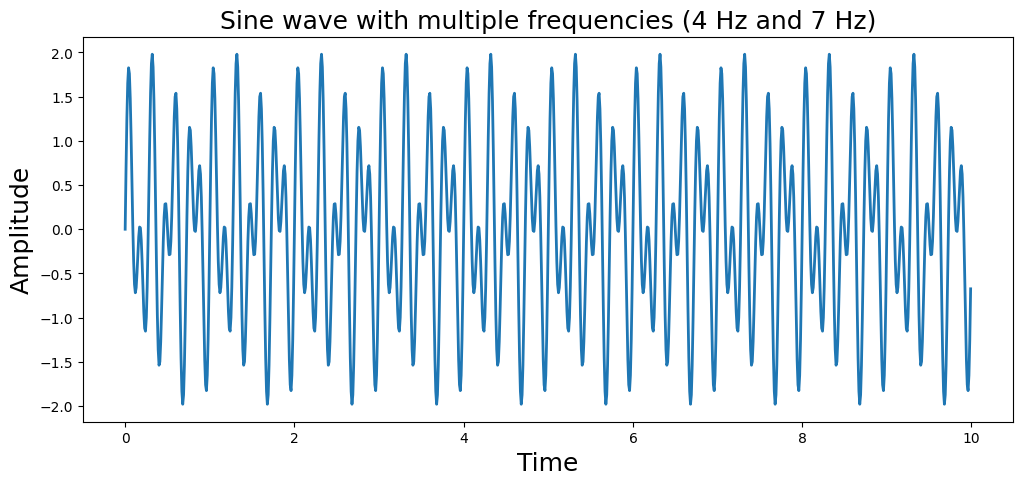

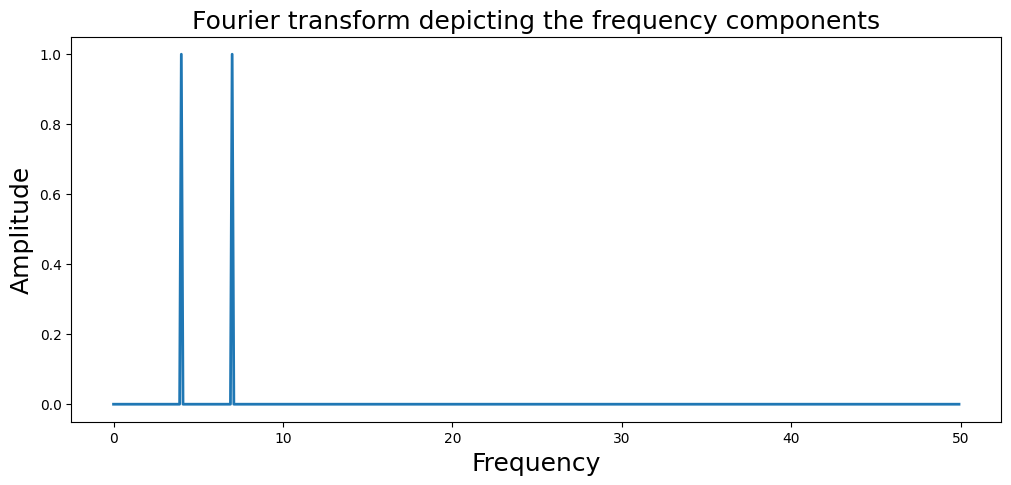

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# How many time points are needed i,e., Sampling Frequency
samplingFrequency   = 100;

# At what intervals time points are sampled
samplingInterval       = 1 / samplingFrequency;

# Begin time period of the signals
beginTime           = 0;

# End time period of the signals
endTime             = 10;

# Frequency of the signals
signal1Frequency     = 4;
signal2Frequency     = 7;

# Time points
time        = np.arange(beginTime, endTime, samplingInterval);

# Create two sine waves
amplitude1 = np.sin(2*np.pi*signal1Frequency*time)
amplitude2 = np.sin(2*np.pi*signal2Frequency*time)

plt.figure(figsize=(12, 5))
plt.plot(time, amplitude1, linewidth=2)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Amplitude', fontsize=18)
plt.title('Sine wave with a frequency of 4 Hz', fontsize=18)

plt.figure(figsize=(12, 5))
plt.plot(time, amplitude2, linewidth=2)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Amplitude', fontsize=18)
plt.title('Sine wave with a frequency of 7 Hz', fontsize=18)


# Add the sine waves
amplitude = amplitude1 + amplitude2

plt.figure(figsize=(12, 5))
plt.plot(time, amplitude, linewidth=2)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Amplitude', fontsize=18)
plt.title('Sine wave with multiple frequencies (4 Hz and 7 Hz)', fontsize=18)


# Frequency domain representation
fourierTransform = 2*np.fft.fft(amplitude)/len(amplitude)           # Normalize amplitude
fourierTransform = fourierTransform[range(int(len(amplitude)/2))] # Exclude sampling frequency


tpCount     = len(amplitude)
values      = np.arange(int(tpCount/2))
timePeriod  = tpCount/samplingFrequency
frequencies = values/timePeriod


plt.figure(figsize=(12, 5))
plt.plot(frequencies, abs(fourierTransform), linewidth=2)
plt.xlabel('Frequency', fontsize=18)
plt.ylabel('Amplitude', fontsize=18)
plt.title('Fourier transform depicting the frequency components', fontsize=18)



In [6]:
!curl 'https://cdn.freesound.org/sounds/259/259195-25e9ca0c-2ba5-42c0-ab2b-d85f1b788f4d?filename=259195__robgrace__male-vocal-verse-section.aiff' \
  -H 'Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8' \
  -H 'Accept-Language: en-GB,en;q=0.8' \
  -H 'Connection: keep-alive' \
  -H 'Referer: https://freesound.org/' \
  -H 'Sec-Fetch-Dest: document' \
  -H 'Sec-Fetch-Mode: navigate' \
  -H 'Sec-Fetch-Site: same-site' \
  -H 'Sec-Fetch-User: ?1' \
  -H 'Sec-GPC: 1' \
  -H 'Upgrade-Insecure-Requests: 1' \
  -H 'User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/133.0.0.0 Safari/537.36' \
  -H 'cache-control: no-cache' \
  -H 'sec-ch-ua: "Not(A:Brand";v="99", "Brave";v="133", "Chromium";v="133"' \
  -H 'sec-ch-ua-mobile: ?0' \
  -H 'sec-ch-ua-platform: "macOS"' > male_singing.aiff

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 14.0M  100 14.0M    0     0  3706k      0  0:00:03  0:00:03 --:--:-- 3706k


## Audio sampling and quantization

In [2]:
!wget -nc https://drwuz.com/CSC3160/materials/audio/xueyao_singing.wav

!pip install pysoundfile
!pip install bitstring
!pip install librosa

--2025-03-04 08:03:36--  https://drwuz.com/CSC3160/materials/audio/xueyao_singing.wav
Resolving drwuz.com (drwuz.com)... 185.199.108.153
Connecting to drwuz.com (drwuz.com)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1513894 (1.4M) [audio/wav]
Saving to: ‘xueyao_singing.wav’

xueyao_singing.wav  100%[===================>]   1.44M  5.80MB/s    in 0.2s    

2025-03-04 08:03:37 (5.80 MB/s) - ‘xueyao_singing.wav’ saved [1513894/1513894]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.1/286.1 kB 10.6 MB/s eta 0:00:00


Sampling rate: 44100 samples/second
Signal size: 4882893 samples
Signal duration: 110.723 seconds


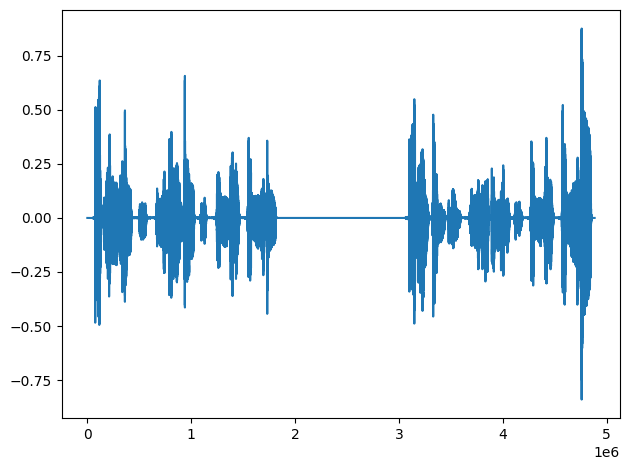

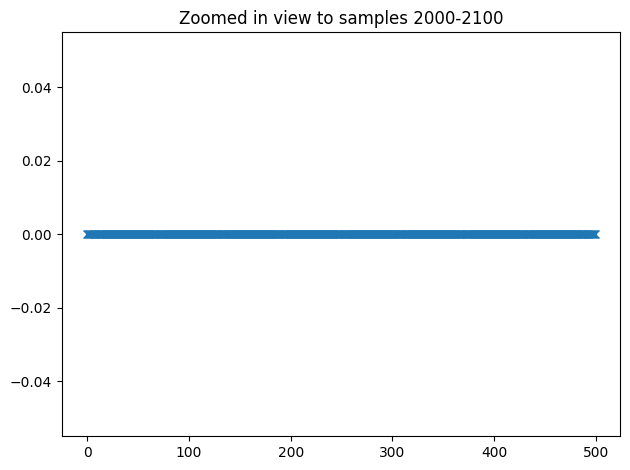

In [8]:
import soundfile
import matplotlib.pyplot as plt
import IPython
audio_signal, sampling_rate = soundfile.read('male_singing.aiff')
print('Sampling rate: {} samples/second'.format(sampling_rate))
print('Signal size: {} samples'.format(audio_signal.shape[0]))
print('Signal duration: {:.3f} seconds'.format(audio_signal.shape[0] / sampling_rate))
plt.plot(audio_signal)
plt.tight_layout()
plt.figure()
plt.plot(audio_signal[50000:50500], marker='x')
plt.title('Zoomed in view to samples 2000-2100')
plt.tight_layout()


IPython.display.Audio('xueyao_singing.wav')


### Resampling

In [ ]:
import librosa
import IPython.display as ipd

for resample_rate in [4000, 8000, 16000, sampling_rate]:
  resampled_signal = librosa.resample(audio_signal.squeeze(), orig_sr=sampling_rate, target_sr=resample_rate, res_type="kaiser_best")

  print("Audio at sampling rate: ", resample_rate)
  ipd.display(ipd.Audio(resampled_signal, rate=resample_rate))


Audio at sampling rate:  4000


Audio at sampling rate:  8000


Audio at sampling rate:  16000


Audio at sampling rate:  48000


Text(0, 0.5, 'Amplitude')

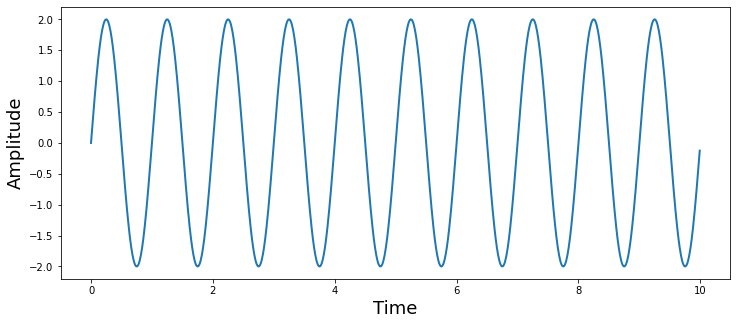

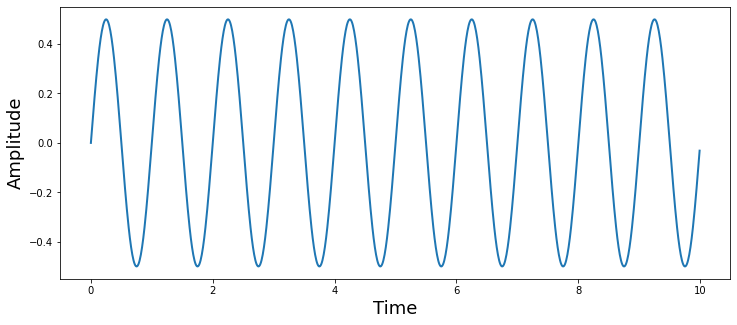

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# How many time points are needed i,e., Sampling Frequency
samplingFrequency   = 100;

# At what intervals time points are sampled
samplingInterval       = 1 / samplingFrequency;

# Begin time period of the signals
beginTime           = 0;

# End time period of the signals
endTime             = 10;

# Frequency of the signals
signal1Frequency     = 1;
signal2Frequency     = 7;

# Time points
time        = np.arange(beginTime, endTime, samplingInterval);

# Create two sine waves
amplitude1 = 2*np.sin(2*np.pi*signal1Frequency*time)
amplitude2 = 0.5*np.sin(2*np.pi*signal1Frequency*time)

plt.figure(figsize=(12, 5))
plt.plot(time, amplitude1, linewidth=2)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Amplitude', fontsize=18)
# plt.title('Sine wave with a frequency of 4 Hz', fontsize=18)

plt.figure(figsize=(12, 5))
plt.plot(time, amplitude2, linewidth=2)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Amplitude', fontsize=18)
# plt.title('Sine wave with a frequency of 7 Hz', fontsize=18)

